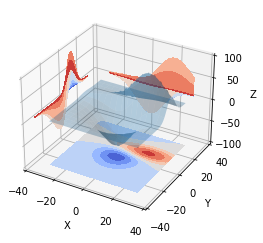

In [14]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


In [2]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_gtkagg import FigureCanvasGTKAgg as FigureCanvas
from matplotlib.backends.backend_gtkagg import NavigationToolbar2GTKAgg as NavigationToolbar

win = gtk.Window()
win.connect("destroy", lambda x: gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

vbox = gtk.VBox()
win.add(vbox)

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot([1,2,3])

canvas = FigureCanvas(fig)  # a gtk.DrawingArea
vbox.pack_start(canvas)
toolbar = NavigationToolbar(canvas, win)
vbox.pack_start(toolbar, False, False)

win.show_all()
gtk.main()

ModuleNotFoundError: No module named 'matplotlib.backends.backend_gtkagg'

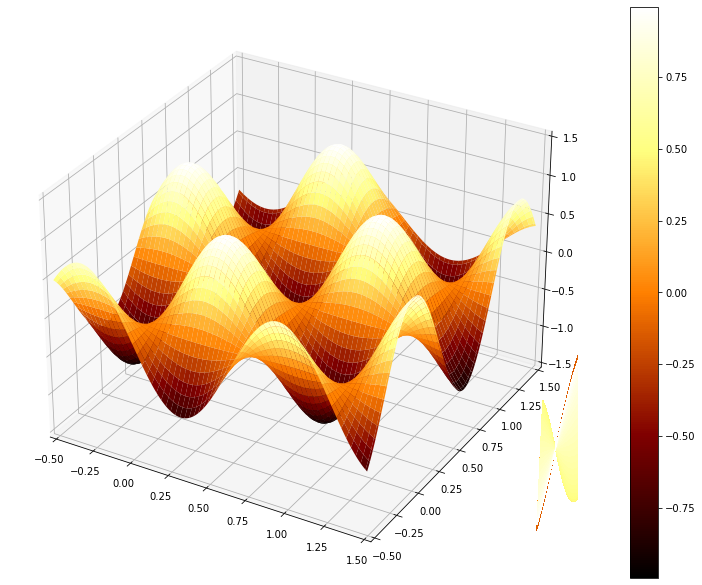

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
 
x= np.arange(-0.5,1.5,0.01)
y= np.arange(-0.5,1.5,0.01)
z= np.sin(10*x*y)
X,Y = np.meshgrid(x,y)
Z = np.sin(X*5)*np.cos(Y*5)
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
surf=ax.plot_surface(X,Y,Z,cmap='afmhot',linewidth=0,antialiased='True',rstride=3,cstride=3)
ax.contourf(X, Y, Z,100, zdir='x', offset=2.5,cmap='afmhot')
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_zlim([-1.5, 1.5])
fig.colorbar(surf)
fig.set_size_inches(18.5, 10.5)  
plt.show()
inter

In [20]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 2 * np.pi)

def update(w = 1.0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(w * x))

    fig.canvas.draw()

interact(update);

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [ ]:
import sys
import matplotlib
matplotlib.use('Qt5Agg')

from PyQt5 import QtCore, QtWidgets

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg
from matplotlib.figure import Figure


class MplCanvas(FigureCanvasQTAgg):

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)


class MainWindow(QtWidgets.QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        # Create the maptlotlib FigureCanvas object, 
        # which defines a single set of axes as self.axes.
        sc = MplCanvas(self, width=5, height=4, dpi=100)
        sc.axes.plot([0,1,2,3,4], [10,1,20,3,40])
        self.setCentralWidget(sc)

        self.show()


app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
app.exec_()